In [32]:
import pandas as pd
import numpy as np
import os
from nice_funcs.indicators import EWMA,Normalize

In [33]:
path_diario = './assets/1d/'
ativos = os.listdir(path_diario)

In [34]:
ativosOHLC = {}
for ativo in ativos:
    ativosOHLC[ativo.replace('.xlsx','')] = pd.read_excel(os.path.join(path_diario,ativo),index_col=0)
    

In [35]:
close_prices = {}
for k in ativosOHLC.keys():
  close_prices[k] = ativosOHLC[k].Close


In [36]:
df_fechamento = pd.DataFrame(close_prices)
df_fechamento_normalized = df_fechamento.apply(lambda row: Normalize(row))

In [37]:
df_fechamento_normalized_ewma_5 = df_fechamento_normalized.apply(lambda row: EWMA(row,5))
df_fechamento_normalized_ewma_20 = df_fechamento_normalized.apply(lambda row: EWMA(row,20))
diff_ewma20_ewma5 = (df_fechamento_normalized_ewma_20 - df_fechamento_normalized_ewma_5)

In [40]:
df_fechamento_normalized.iloc[-1]

ADAUSDT   -0.316771
BNBUSDT    0.364773
BTCUSDT    0.459313
ETHUSDT    0.506304
LTCUSDT   -0.185105
XRPUSDT    0.656200
Name: 2023-08-04 00:00:00, dtype: float64

<Axes: xlabel='Date'>

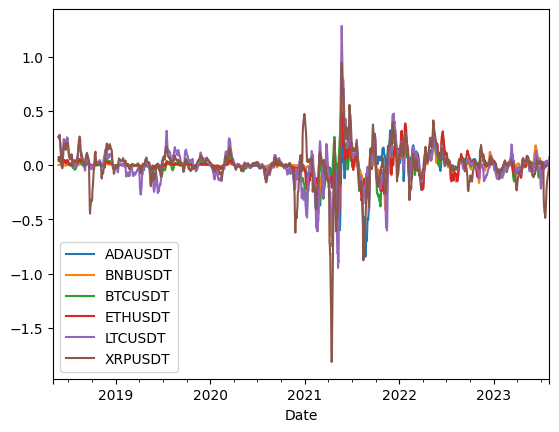

In [39]:
diff_ewma20_ewma5.plot()

In [41]:
class ReplayBuffer:
  def __init__(self, max_size, input_shape,n_actions):
    self.mem_size = max_size
    self.mem_cntr = 0
    self.state_memory = np.zeros((self.mem_size, *input_shape))
    self.new_state_memory = np.zeros((self.mem_size, *input_shape))
    self.actions_memory = np.zeros((self.mem_size, n_actions))
    self.reward_memory = np.zeros(self.mem_size)
    self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)

  def store_transition(self, state, action, reward, new_state, done):
    index = self.mem_cntr % self.mem_size

    self.state_memory[index] = state 
    self.new_state_memory[index] = new_state 
    self.actions_memory[index] = action 
    self.reward_memory[index] = reward 
    self.terminal_memory[index] = done 

    self.mem_cntr += 1

  


     

In [ ]:
ReplayBuffer()